# Análise exploratória de dados

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns

from IPython.display import display, Markdown
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from scipy import stats

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [17]:
def  separador():
    print("=" * 50 + " Separador " + "=" * 50)

## 1. Leitura do conjunto de dados

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/tips.csv', header=None, names=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'])
df = df.to_csv('../data/raw/tips.csv')
df = pd.read_csv('../data/raw/tips.csv')
df.head()


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,total_bill,tip,sex,smoker,day,time,size
1,1,16.99,1.01,Female,No,Sun,Dinner,2
2,2,10.34,1.66,Male,No,Sun,Dinner,3
3,3,21.01,3.5,Male,No,Sun,Dinner,3
4,4,23.68,3.31,Male,No,Sun,Dinner,2


## 2. Descrição dos dados

<p align="center">
  <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMzcxdHVndmZkdm45Z2hvbnViNXVkazEwZnZzdnFpNzd3dzduNWczeCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/wz5ZpvQqjzJEb8uaEz/giphy.gif"/>
</p>

O conjunto de dados "tips.csv" da Atlatico Academy contém informações detalhadas sobre 245 contas de um restaurante, incluindo o valor total da conta em dólares, o valor da gorjeta em dólares, o gênero do cliente, o hábito de fumar, o dia da semana (de segunda a domingo) e o horário da refeição (almoço ou jantar). O objetivo desta análise é identificar padrões de consumo e os fatores que influenciam o valor das gorjetas, como o dia da semana, o horário da refeição e o tamanho do grupo.

## 2.1. Dicionário de dados

In [19]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,total_bill,Valor total da conta ou transação,quantitativa,contínua
1,tip,Valor da Gorjeta,quantitativa,contínua
2,sex,Sexo do Cliente,qualitativa,nominal
3,smoker,Se o cliente fuma,qualitativa,nominal
4,day,Dia da Semana,qualitativa,nominal
5,time,Periodo do dia (Almoço ou Jantar),qualitativa,nominal
6,size,Tamanho do grupo,quantitativa,discreta


In [20]:
quantidade_qualitativa = dicionario.query("tipo == 'qualitativa'").shape[0]
quantidade_quantitativa = dicionario.query("tipo == 'quantitativa'").shape[0]

quantidade_qualitativa_nominal = dicionario.query("subtipo == 'nominal'").shape[0]
quantidade_qualitativa_ordinal = dicionario.query("subtipo == 'ordinal'").shape[0]

quantidade_quantitativa_continua = dicionario.query("subtipo == 'contínua'").shape[0]
quantidade_quantitativa_discreta = dicionario.query("subtipo == 'discreta'").shape[0]

display(Markdown(f"""
---
 - São {dicionario.shape[0]} variáveis: {quantidade_qualitativa} qualitativas e {quantidade_quantitativa} quantitativas e 1 variável inútil;
    - Qualitativas: {quantidade_qualitativa_nominal} nominais e {quantidade_qualitativa_ordinal} ordinais;
    - Quantitativas: {quantidade_quantitativa_continua} contínuas e {quantidade_quantitativa_discreta} discretas;
---
"""))


---
 - São 7 variáveis: 4 qualitativas e 3 quantitativas e 1 variável inútil;
    - Qualitativas: 4 nominais e 0 ordinais;
    - Quantitativas: 2 contínuas e 1 discretas;
---


## 3. Perguntas de partida e hipóteses¶

*  **Hipótese 1**: Qual grupo deixa mais gorjetas, mulheres ou homens?
*  **Hipótese 3**: Os efeitos do hábito de fumar influenciam a gorjeta?
*  **Hipótese 4**: Os dias da semana influenciam significativamente no valor das gorjetas?
*  **Hipótese 5**: E em relacao ao horario, qual o que dos dois da mais gorjetas, jantar ou almoço?

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [21]:
# colunas (variáveis) contendo valores faltantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
    
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis `[]`contém valores faltantes. Além disso sabemos que temos `0` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

## Qual a distribuição dos dados (variável por variável)?

In [22]:
df.describe(include='all')

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
count,245.000000,245,245,245,245,245,245,245
unique,NaN,230,124,3,3,5,3,7
top,NaN,13.42,2,Male,No,Sat,Dinner,2
freq,NaN,3,33,157,151,87,176,156
mean,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,70.869599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,183.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   * Variabilidade no valor da conta e da gorjeta: A grande quantidade de valores únicos em total_bill e tip indica uma alta variabilidade nos valores das contas e das gorjetas.
   * Dias da semana e horários: A maioria das refeições ocorreu no sábado (Sat) e no jantar (Dinner).
   * Tamanho dos grupos: O tamanho médio dos grupos parece ser relativamente pequeno, com 2 pessoas sendo o tamanho mais comum.

In [23]:
separador()

================================================== Separador ==================================================


## Distribuição das variáveis qualitativas

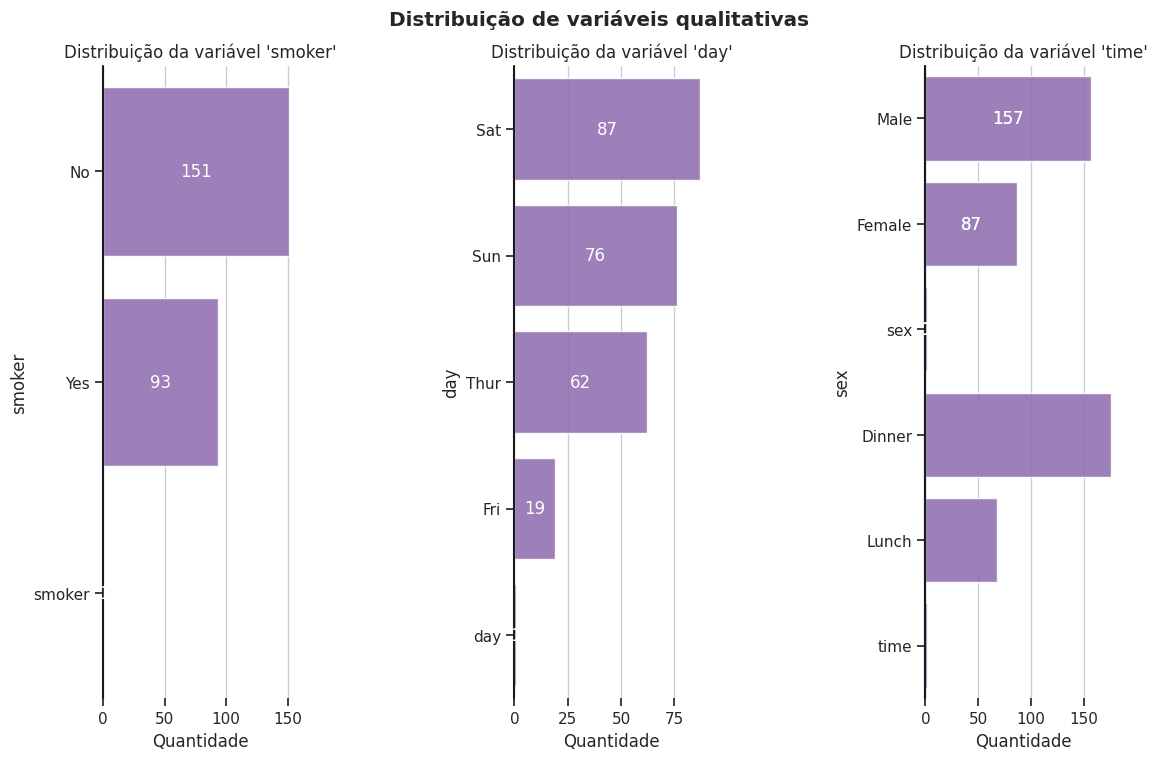

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12,8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = None
    if dicionario.query('variavel == @variavel').subtipo.to_list()[0] == 'nominal':
        order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        y=variavel,
        ax=axes.flatten()[i-1],
        color=colors[0],
        alpha=0.9,
        order=order,
        orient='h'
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axvline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')
plt.show()

* Maioria não fumante: A grande maioria dos clientes (151) não fuma, enquanto apenas 93 declararam ser fumantes. Isso indica que o perfil predominante dos clientes é de não-fumantes.
* Final de semana mais popular: Os dias de sábado e domingo (representados por 1 e 2, respectivamente) concentraram a maior parte das visitas, com 87 e 76 registros, respectivamente. Isso sugere que o restaurante é mais frequentado nos finais de semana.
* Menor movimento em um dia: O dia da semana representado pelo número 0 (Sexta-Feira) teve o menor número de visitas, indicando que este pode ser um dia mais tranquilo para o estabelecimento.

In [25]:
separador()

================================================== Separador ==================================================


## Distribuição das variáveis quantitativas

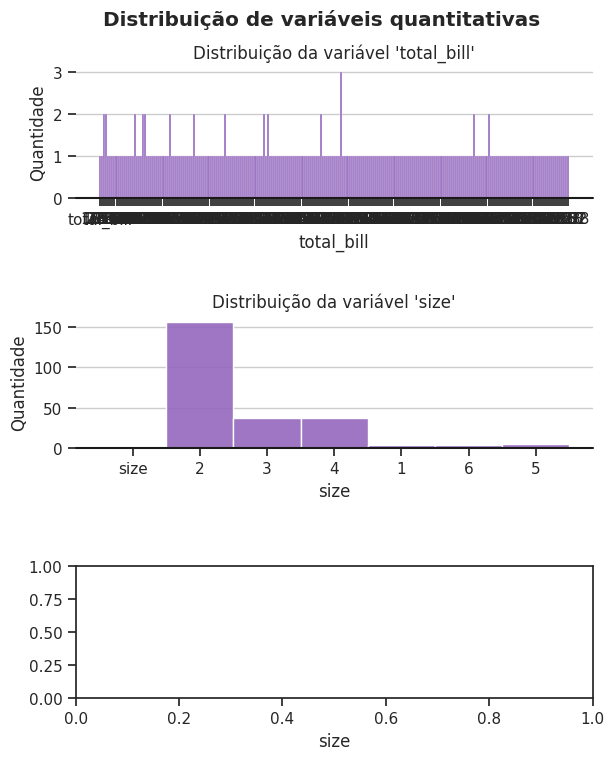

In [26]:
fig, axes = plt.subplots(3, figsize=(7,8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')

for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel != 'tip'").variavel.to_list()): #Aqui deu um probleminha com a variavel tip, ai descidi remover ela. Avariavel `tip` tinha muitos valores e era todos muito baixos, sempre menor que 2. tentei ajustar a escada dela, mudei pra escala logaritima, mas anda deu certo
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )

    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()

Como foi observado, tive que remover a variavel tip, e por consequencia a scala da variavel size acabou mudando tambem, e apareceu outra size. Posteriormente, pretendo pensar em alguma coisa para poder corrigir isso, mas por enquanto, deixarei assim, porque meu objetivo ate entao foi concluido.

* Possíveis agrupamentos: A existência de picos em determinadas faixas de valores pode indicar a existência de agrupamentos de clientes com hábitos de consumo semelhantes. Por exemplo, o pico na faixa de 20-25 poderia indicar um menu popular ou uma promoção que atraiu muitos clientes para essa faixa de valor.